<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#머신러닝" data-toc-modified-id="머신러닝-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>머신러닝</a></span><ul class="toc-item"><li><span><a href="#학습용-검증용-데이터-분리" data-toc-modified-id="학습용-검증용-데이터-분리-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>학습용 검증용 데이터 분리</a></span></li><li><span><a href="#DT-(Decision-Tree)" data-toc-modified-id="DT-(Decision-Tree)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DT (Decision Tree)</a></span><ul class="toc-item"><li><span><a href="#학습실행" data-toc-modified-id="학습실행-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>학습실행</a></span></li><li><span><a href="#학습이-완료된-DT객체에서-테스트-데이터-세트로-예측수행" data-toc-modified-id="학습이-완료된-DT객체에서-테스트-데이터-세트로-예측수행-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>학습이 완료된 DT객체에서 테스트 데이터 세트로 예측수행</a></span></li><li><span><a href="#평가" data-toc-modified-id="평가-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>평가</a></span></li></ul></li></ul></li><li><span><a href="#교차검증" data-toc-modified-id="교차검증-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>교차검증</a></span><ul class="toc-item"><li><span><a href="#K-Fold" data-toc-modified-id="K-Fold-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>K Fold</a></span></li><li><span><a href="#StratifiedKFold" data-toc-modified-id="StratifiedKFold-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>StratifiedKFold</a></span></li><li><span><a href="#cross_val_score()" data-toc-modified-id="cross_val_score()-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>cross_val_score()</a></span></li></ul></li><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GridSearchCV</a></span></li><li><span><a href="#Data-Encoding" data-toc-modified-id="Data-Encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Encoding</a></span><ul class="toc-item"><li><span><a href="#Label-Encoder" data-toc-modified-id="Label-Encoder-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Label Encoder</a></span></li><li><span><a href="#One-Hot-Encoder" data-toc-modified-id="One-Hot-Encoder-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>One-Hot Encoder</a></span></li></ul></li><li><span><a href="#Feature-Scaling-&amp;-Standardization" data-toc-modified-id="Feature-Scaling-&amp;-Standardization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Scaling &amp; Standardization</a></span></li><li><span><a href="#타이타닉-모델링-및-성능-평가" data-toc-modified-id="타이타닉-모델링-및-성능-평가-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>타이타닉 모델링 및 성능 평가</a></span></li><li><span><a href="#기현이형-코드" data-toc-modified-id="기현이형-코드-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>기현이형 코드</a></span></li></ul></div>

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris_data = iris.data
iris_label = iris.target
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 머신러닝

## 학습용 검증용 데이터 분리

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_label, test_size=0.2, random_state=11)  # 검증용 데이터 크기

## DT (Decision Tree)

In [22]:
X_train.shape, y_train.shape, y_test.shape, X_test.shape,

((120, 4), (120,), (30,), (30, 4))

### 학습실행

In [23]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### 학습이 완료된 DT객체에서 테스트 데이터 세트로 예측수행

In [24]:
pred = dt_clf.predict(X_test)

### 평가

In [25]:
print('정확도:', accuracy_score(y_test, pred))

정확도: 0.9333333333333333


# 교차검증
- K Fold
- Stratified K Fold
- cross_val_score

## K Fold

In [26]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter}회차, 정확도:{accuracy}, 학습용 데이터:{train_size},검증용 데이터:{test_size}')
    print(f'{n_iter}회차 검증세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)
print(f'평균 검증 정화도: {np.mean(cv_accuracy)}')

1회차, 정확도:1.0, 학습용 데이터:120,검증용 데이터:30
1회차 검증세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2회차, 정확도:0.9667, 학습용 데이터:120,검증용 데이터:30
2회차 검증세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3회차, 정확도:0.8667, 학습용 데이터:120,검증용 데이터:30
3회차 검증세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4회차, 정확도:0.9333, 학습용 데이터:120,검증용 데이터:30
4회차 검증세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5회차, 정확도:0.7333, 학습용 데이터:120,검증용 데이터:30
5회차 검증세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정화도: 0.9


In [27]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [28]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포:\n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()}')

1회차 교차검증
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
2회차 교차검증
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
3회차 교차검증
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


## StratifiedKFold
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

In [29]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

iris_df_exlabel = iris_df.drop(['label'], axis=1)
n_iter = 0

for train_index, test_index in skf.split(iris_df_exlabel, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포:\n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()}\n')

1회차 교차검증
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64

2회차 교차검증
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64

3회차 교차검증
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64



In [30]:
# [과제] 상기 케이스에서 대한 교차검증 검증을 아래와 같이 수해아셍.
# -각 회차별 교차 검증 데이터 밒 검증 세트 인덱스
# -평균 검증 정확도

## cross_val_score()
- 교차 검증을 보다 간편하게

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
data = iris.data
label = iris.target
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
scores

array([0.98, 0.94, 0.98])

# GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


In [36]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:', grid_dtree.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.975


In [37]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 정확도 :', accuracy_score(y_test, pred))

테스트 데이터 정확도 : 0.9666666666666667


# Data Encoding

## Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
print('인코딩 반환값:', labels)

인코딩 반환값: [0 1 4 5 3 2 2]


In [39]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

## One-Hot Encoder

In [40]:
from sklearn.preprocessing import OneHotEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '믹서', '믹서']
# 숫자값 변환
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels = labels.reshape(-1, 1)
labels
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
oh_labels.toarray()  # 희소행렬

dummy = pd.DataFrame(items)
dummy = pd.get_dummies(dummy)
dummy

,0_TV,0_냉장고,0_믹서,0_선풍기,0_전자렌지,0_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


# Feature Scaling & Standardization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris_df.columns)
display(iris_scaled_df.head())
display('평균:', iris_scaled_df.mean())
display('분산:', iris_scaled_df.var())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


'평균:'

sepal length (cm)   -2.775558e-16
sepal width (cm)    -9.695948e-16
petal length (cm)   -8.652338e-16
petal width (cm)    -4.662937e-16
label                1.184238e-17
dtype: float64

'분산:'

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
label                1.006711
dtype: float64

In [42]:
# Min Max 수행후 최대 최솟을 출력하세요.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(iris_df)
scaled_df = pd.DataFrame(scaled_data, columns=iris_df.columns)
display(scaled_df)
display('최댓값:', scaled_df.max())
display('최솟값:', scaled_df.min())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


'최댓값:'

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
label                1.0
dtype: float64

'최솟값:'

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
label                0.0
dtype: float64

# 타이타닉 모델링 및 성능 평가

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [118]:
df = pd.read_csv('./dataset/train.csv')
df['Title'] = df['Name'].apply(lambda x: re.search(
    ' ([A-Za-z]+)\.', x).group(0).strip())
df['Age'] = df.groupby(['Pclass', 'Sex', 'Title'])[  #보완
    'Age'].apply(lambda x: x.fillna(x.mean()))
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
cnt, bins = np.histogram(df.Fare, bins=5)
df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[
                         0, 1, 2, 3, 4], include_lowest=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,Twenty,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Thirty,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Twenty,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Thirty,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,Thirty,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev.,Twenty,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,Teenage,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.123188,1,2,W./C. 6607,23.4500,NaN,S,Miss.,Teenage,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,Twenty,0


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

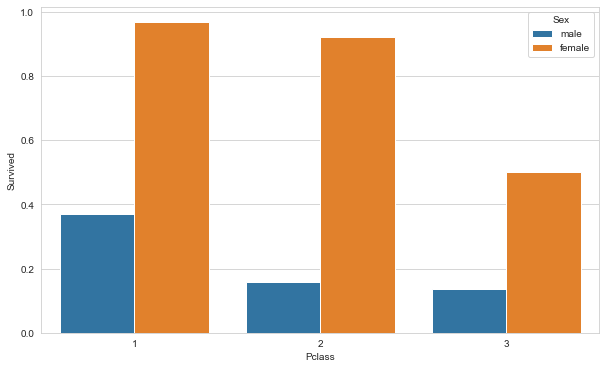

In [117]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

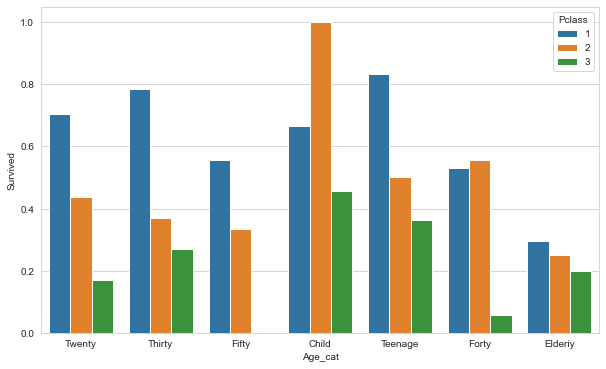

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_cat', y='Survived', hue='Pclass', ci=None)

#

<AxesSubplot:xlabel='Fare_bins', ylabel='Survived'>

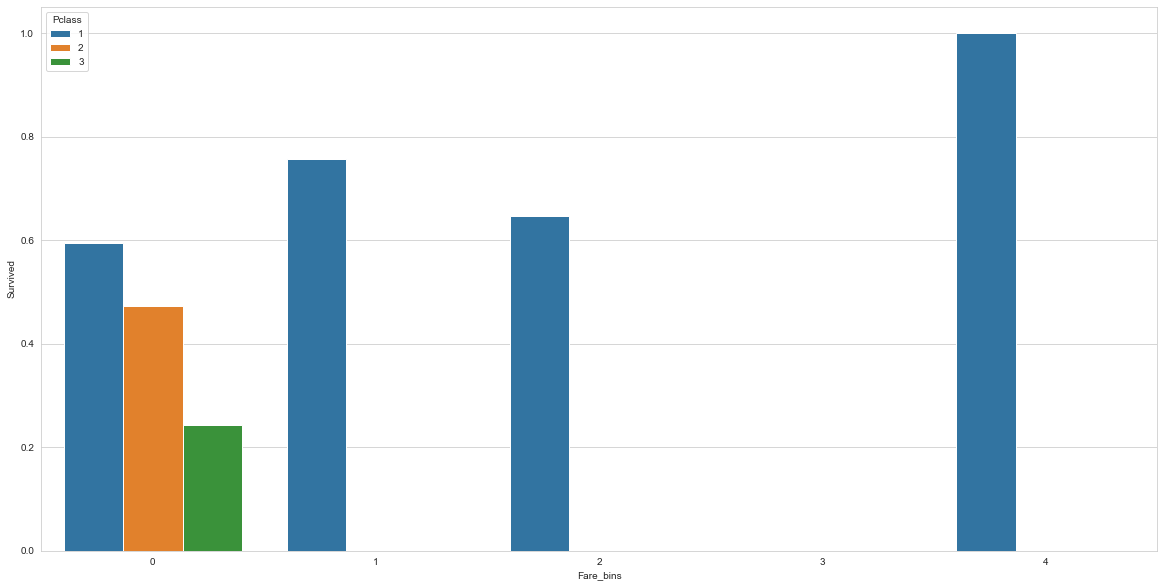

In [116]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Fare_bins', y='Survived', hue='Pclass', ci=None)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

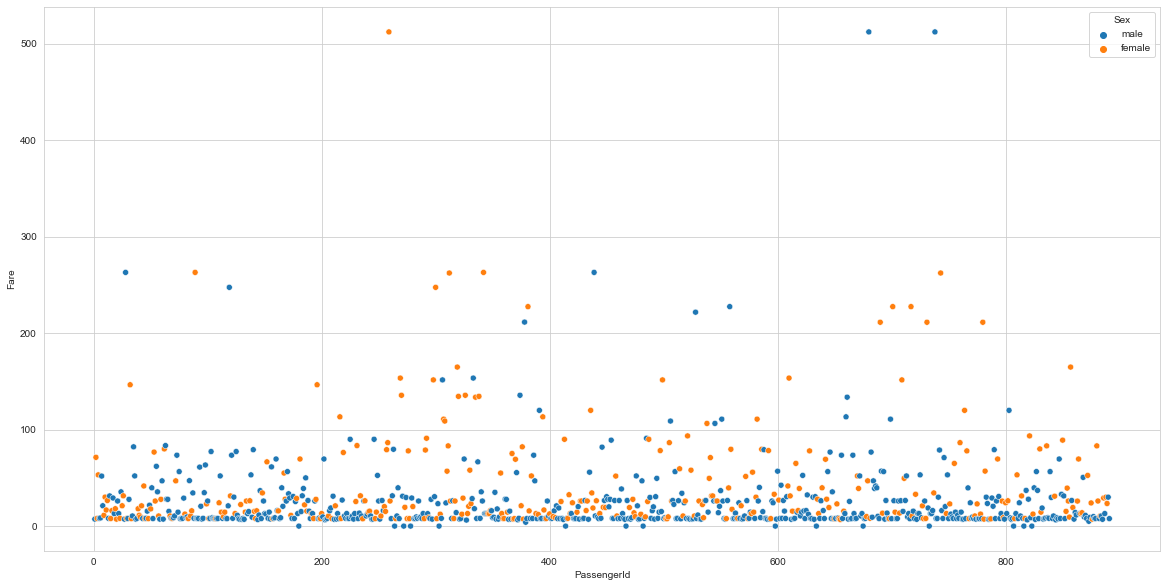

In [113]:
plt.figure(figsize=(20, 10))sns.scatterplot(data=df, x='PassengerId', y='Fare', hue='Sex')

In [174]:
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def get_category(age):
    cat = ''
    if age < 10:
        cat = 'Child'
    elif 10 <= age < 20:
        cat = 'Teenage'
    elif 20 <= age < 30:
        cat = 'Twenty'
    elif 30 <= age < 40:
        cat = 'Thirty'
    elif 40 <= age < 50:
        cat = 'Forty'
    elif 10 <= age < 60:
        cat = 'Fifty'
    else:
        cat = 'Elderiy'
    return cat


df = pd.read_csv('./dataset/train.csv')
df['Title'] = df['Name'].apply(lambda x: re.search(
    ' ([A-Za-z]+)\.', x).group(0).strip())
df['Family'] = df['SibSp']+df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
df = df.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis=1)
df['Age'] = df.groupby(['Pclass', 'Sex', 'Title'])[
    'Age'].apply(lambda x: x.fillna(x.mean()))
df['Embarked'].fillna('S', inplace=True)
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
cnt, bins = np.histogram(df.Fare, bins=5)
df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[
                         0, 1, 2, 3, 4], include_lowest=True)
df = df.drop(['Age', 'Title','Fare','Fare'], axis=1)
features = ['Sex', 'Embarked', 'Age_cat']
for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

# df=pd.get_dummies(df[['Pclass','Sex','Embarked','Age_cat','Fare_bins']])
display(df)
df1 = df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df1, df.Survived, test_size=0.2)

# dtree = RandomForestClassifier()
dtree = DecisionTreeClassifier()
parameters = {'max_depth': [3,4,5],
              'min_samples_split': [2, 3, 4]}
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
display(scores_df[['params', 'mean_test_score', 'rank_test_score']])
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print(f'데스트 정확도 : {accuracy_score(y_test, pred)}')

,Survived,Pclass,Sex,Embarked,Family,Age_cat,Fare_bins
0,0,3,1,2,1,6,0
1,1,1,0,0,1,5,0
2,1,3,0,2,0,6,0
3,1,1,0,2,1,5,0
4,0,3,1,2,0,5,0
...,...,...,...,...,...,...,...
886,0,2,1,2,0,6,0
887,1,1,0,2,0,4,0
888,0,3,0,2,3,4,0
889,1,1,1,0,0,6,0


,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_split': 2}",0.815907,6
1,"{'max_depth': 3, 'min_samples_split': 3}",0.815907,6
2,"{'max_depth': 3, 'min_samples_split': 4}",0.815907,6
3,"{'max_depth': 3, 'min_samples_split': 5}",0.815907,6
4,"{'max_depth': 3, 'min_samples_split': 6}",0.815907,6
5,"{'max_depth': 3, 'min_samples_split': 7}",0.815907,6
6,"{'max_depth': 5, 'min_samples_split': 2}",0.810332,17
7,"{'max_depth': 5, 'min_samples_split': 3}",0.815966,5
8,"{'max_depth': 5, 'min_samples_split': 4}",0.813149,14
9,"{'max_depth': 5, 'min_samples_split': 5}",0.811740,16


데스트 정확도 : 0.7821229050279329


In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def get_category(age):
    cat = ''
    if age < 10:
        cat = 'Child'
    elif 10 <= age < 20:
        cat = 'Teenage'
    elif 20 <= age < 30:
        cat = 'Twenty'
    elif 30 <= age < 40:
        cat = 'Thirty'
    elif 40 <= age < 50:
        cat = 'Forty'
    elif 10 <= age < 60:
        cat = 'Fifty'
    else:
        cat = 'Elderiy'
    return cat

df = pd.read_csv('./dataset/train.csv')

df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(0).strip())
df['Age'] = df.groupby(['Pclass', 'Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.mean()))
df['Embarked'].fillna('S', inplace=True)
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
_, bins = np.histogram(df.Fare, bins=5)
df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[0, 1, 2, 3, 4], include_lowest=True)
df['Family'] = df['SibSp']+df['Parch']
df.loc[df['Family']>1 ,'Family'] = 1
df.drop(['SibSp','Parch','Ticket', 'Name', 'PassengerId','Cabin','Age', 'Title','Fare','Fare_bins'], axis=1,inplace=True)

df1 = df.copy()
df1 = df.drop(['Survived'],axis=1)
df1['Pclass'] = df1['Pclass'].astype('str')
df1 = pd.get_dummies(df1)

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(df1, df.Survived, test_size=0.2,random_state=i)

    dtree = DecisionTreeClassifier()
    dtree = RandomForestClassifier(random_state=15)
    print(f'{i}번째')
    parameters = {'max_depth': [5,7,9],
                  'min_samples_split': [3, 5, 7]}

    grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
    grid_dtree.fit(X_train, y_train)
    scores_df = pd.DataFrame(grid_dtree.cv_results_)
    # display(scores_df[['params', 'mean_test_score', 'rank_test_score']])
    print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
    print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_.round(3)}')
    estimator = grid_dtree.best_estimator_
    pred = estimator.predict(X_test)
    print(f'데스트 정확도 : {accuracy_score(y_test, pred)}')

1번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 3}
GridSearchCV 최고 정확도 : 0.83
데스트 정확도 : 0.770949720670391
2번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 3}
GridSearchCV 최고 정확도 : 0.829
데스트 정확도 : 0.7988826815642458
3번째
GridSearchCV 최적 파라미터 : {'max_depth': 9, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.826
데스트 정확도 : 0.770949720670391
4번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.81
데스트 정확도 : 0.8379888268156425
5번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.815
데스트 정확도 : 0.8435754189944135
6번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.815
데스트 정확도 : 0.8547486033519553
7번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.831
데스트 정확도 : 0.7597765363128491
8번째
GridSearchCV 최적 파라미터 : {'max_depth': 7, 'min_samples_split': 3}
GridSearchCV 최고 정확도 : 0.826
데스트 정확도 : 0.8044692737430168
9번째


GridSearchCV 최적 파라미터 : {'max_depth': 9, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.823
데스트 정확도 : 0.7877094972067039
68번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.834
데스트 정확도 : 0.7877094972067039
69번째
GridSearchCV 최적 파라미터 : {'max_depth': 9, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.82
데스트 정확도 : 0.7877094972067039
70번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.829
데스트 정확도 : 0.8100558659217877
71번째
GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 7}
GridSearchCV 최고 정확도 : 0.809
데스트 정확도 : 0.8379888268156425
72번째


# 기현이형 코드

In [ ]:
94 167 123
def transform_features(df):
    df1 = df.copy()
#     def Age_cat(x):
#         if x < 10: return '어린이'
#         elif x < 20: return '10대'
#         elif x < 30 : return '20대'
#         elif x < 40 : return '30대'
#         elif x < 50 : return '40대'
#         elif x < 60 : return '50대'
#         elif x >= 60 : return '노인'
    def Age_cat(x):
        if x < 10: return 0
        elif x < 20: return 1
        elif x < 30 : return 2
        elif x < 40 : return 3
        elif x < 50 : return 4
        elif x < 60 : return 5
        elif x >= 60 : return 6
        
    title = []
    for i in df['Name']:
        a = re.search(', [\w\s]+', i).group()
        b = re.sub(', ', '', a)
        title.append(b)
    df1['Title'] = title
    titlemean = df1.groupby('Title').mean()['Age']
    for i in titlemean.index:
        df1.loc[(df1['Age'].isnull()) & (df1['Title'] == i), 'Age'] = titlemean.loc[i]
    
    df1['Age'].fillna(df1['Age'].mean(), inplace = True)
    df1['Age_cat'] = df1['Age'].apply(Age_cat)
    df1['Family'] = df1['SibSp'] + df1['Parch']
#     df1.loc[df1['Family'] >= 1 , ['Family']] = 1
    scaler1 = MinMaxScaler()
#     scaler2 = StandardScaler()
    df1['Family'] = scaler1.fit_transform(np.array(df1['Family']).reshape(-1, 1))
#     df1['Age_cat'] = scaler1.fit_transform(np.array(df1['Age_cat']).reshape(-1, 1))
#     df1['Fare'] = scaler2.fit_transform(np.array(df1['Fare']).reshape(-1, 1))
    df1['Embarked'].ffill(inplace = True)
    for i in ['Age_cat', 'Sex', 'Embarked']:
        df1[i] = LabelEncoder().fit_transform(df1[i]).reshape(-1, 1)
#     for i in ['Pclass', 'Embarked', 'Sex']:
#         df1[i] = df1[i].astype(str)
    df1.drop(['PassengerId', 'Age', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'Fare'], axis = 1, inplace = True)
    return pd.get_dummies(df1)